# Project ML Classification models

*Filip Jovanović*

Required:
Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.

Sections required report:

- Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation and the benefits that your analysis provides to the business or stakeholders of this data.

- Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.

- Brief summary of data exploration and actions taken for data cleaning and feature engineering.

- Summary of training at least three different classifier models, preferably of different nature in explainability and predictability. For example, you can start with a simple logistic regression as a baseline, adding other models or ensemble models. Preferably, all your models use the same training and test splits, or the same cross-validation method.

- A paragraph explaining which of your classifier models you recommend as a final model that best fits your needs in terms of accuracy and explainability.

- Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your classifier model.

- Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model after adding specific data features that may help you achieve a better explanation or a better prediction.


## About the data
description taken [Kaggle](https://www.kaggle.com/datasets/adilashrafi/bank-marketing-classification-task)

-Bank Client Data:
1. age (numeric)
2. job : Type of job (categorical:
 "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
3. marital : Marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: Has credit in default? (binary: "yes","no")
6. balance: Average yearly balance, in euros (numeric)
7. housing: Has housing loan? (binary: "yes","no")
8. loan: Has personal loan? (binary: "yes","no")
- Related with the Last Contact of the Current Campaign:
9. contact: Contact communication type (categorical: "unknown","telephone","cellular")
10. day: Last contact day of the month (numeric)
11. month: Last contact month of the year (categorical: "jan", "feb", "mar", …, "nov", "dec")
12. duration: Last contact duration, in seconds (numeric)
- Other Attributes:
13. campaign: Number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: Number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means the client was not previously contacted)
15. previous: Number of contacts performed before this campaign and for this client (numeric)
16. poutcome: Outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
- Output Variable (Desired Target):
17. y - Has the client subscribed to a term deposit? (binary: "yes","no")

## Dataset Information
### Additional Information
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required to assess if the product (bank term deposit) would be subscribed ('yes') or not ('no').

### Classification Goal
The goal is to predict if the client will subscribe (yes/no) to a term deposit (variable y). Using various classification models and features of this dataset the main goal of this project will be to find a great predictive model for this bank data set.

In [279]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [280]:
import pandas as pd
import seaborn as sns
import numpy as np

from imblearn.over_sampling import RandomOverSampler, SMOTE
from matplotlib.pyplot import figure
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix,precision_score, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from collections import Counter

After we import all the libraries that we might need, we need to do a quick data analysis:
1. Is there any null or missing values
2. Information about data - which columns are categorical and which are numerical
3. Check if there is any duplicated data
4. How do we encode our categorical variables
5. See the correlation between features and correlation between features and target column
6. We also check skewness of the feature columns 
7. Target column value balance needs to be checked as well

In [281]:
data = pd.read_csv('data/bank_data.csv')
data

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [282]:
data.isnull().value_counts()

Unnamed: 0  age    job    marital  education  default  balance  housing  loan   contact  day    month  duration  campaign  pdays  previous  poutcome  y    
False       False  False  False    False      False    False    False    False  False    False  False  False     False     False  False     False     False    4521
dtype: int64

In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4521 non-null   int64 
 1   age         4521 non-null   int64 
 2   job         4521 non-null   object
 3   marital     4521 non-null   object
 4   education   4521 non-null   object
 5   default     4521 non-null   object
 6   balance     4521 non-null   int64 
 7   housing     4521 non-null   object
 8   loan        4521 non-null   object
 9   contact     4521 non-null   object
 10  day         4521 non-null   int64 
 11  month       4521 non-null   object
 12  duration    4521 non-null   int64 
 13  campaign    4521 non-null   int64 
 14  pdays       4521 non-null   int64 
 15  previous    4521 non-null   int64 
 16  poutcome    4521 non-null   object
 17  y           4521 non-null   object
dtypes: int64(8), object(10)
memory usage: 635.9+ KB


In [284]:
data.duplicated().value_counts()

False    4521
dtype: int64

In [285]:
data = data.drop(columns='Unnamed: 0',axis=1)
data.replace({'yes':1,'no':0}, inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,feb,129,4,211,3,other,0


In [286]:
print(data.marital.unique(), data.columns.get_loc('marital'))
print(data.education.unique(), data.columns.get_loc('education'))
print(data.contact.unique(), data.columns.get_loc('contact'))
print(data.month.unique(), data.columns.get_loc('month'))
print(data.poutcome.unique(), data.columns.get_loc('poutcome'))
print(data.job.unique(), data.columns.get_loc('job'))

['married' 'single' 'divorced'] 2
['primary' 'secondary' 'tertiary' 'unknown'] 3
['cellular' 'unknown' 'telephone'] 8
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec'] 10
['unknown' 'failure' 'other' 'success'] 15
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown'] 1


We see all unique values of our object columns.

In [287]:
y = data['y']
X = data.drop(columns=['y'],axis=1)

In [288]:
le = LabelEncoder()
le.fit(['divorced', 'single', 'married'])
X['marital'] = le.transform(X['marital'])

le = LabelEncoder()
le.fit(['unknown', 'primary', 'secondary', 'tertiary'])
X['education'] = le.transform(X['education'])

le = LabelEncoder()
le.fit(['unknown', 'cellular', 'telephone'])
X['contact'] = le.transform(X['contact'])

le = LabelEncoder()
le.fit(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
X['month'] = le.transform(X['month'])

le = LabelEncoder()
le.fit(['unknown', 'failure', 'other', 'success'])
X['poutcome'] = le.transform(X['poutcome'])

le = LabelEncoder()
le.fit(['unemployed', 'services', 'management', 'blue-collar', 'self-employed',
        'technician', 'entrepreneur', 'admin.', 'student', 'housemaid', 'retired',
        'unknown'] )
X['job'] = le.transform(X['job'])

X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1


### Summary of the data analysis

There is no null or missing values, there is no duplicated data and all categorical data has been encoded.

In [289]:
data1= X.copy()
data1 = data1.join(y)

<AxesSubplot:>

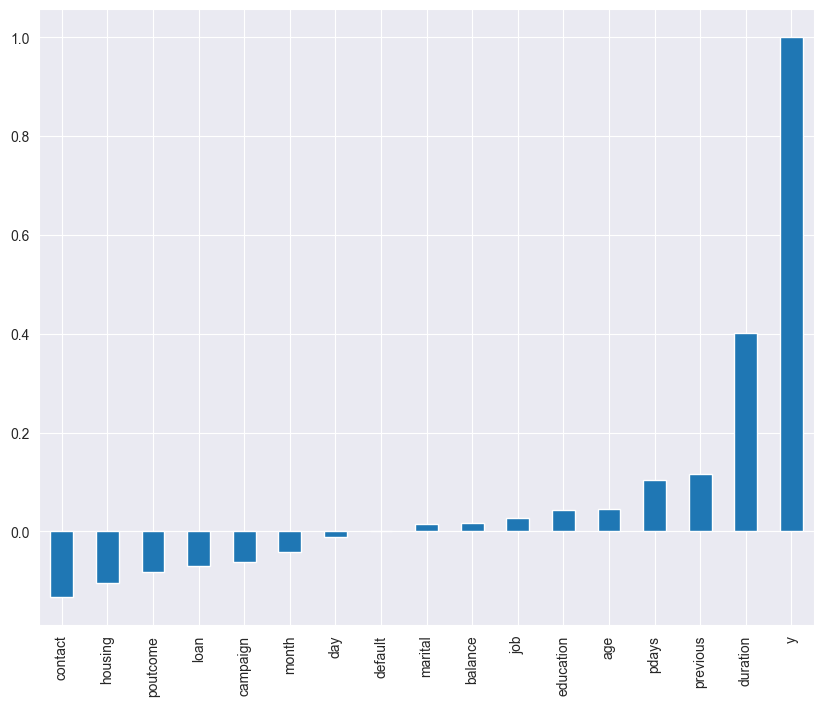

In [290]:
corelations = data1.corr()['y'].sort_values()
corelations.plot(kind='bar', figsize=(10,8))

In [291]:
data1.corr().sort_values(by=['y'], ascending=False)['y']

y            1.000000
duration     0.401118
previous     0.116714
pdays        0.104087
age          0.045092
education    0.042987
job          0.027401
balance      0.017905
marital      0.015042
default      0.001303
day         -0.011244
month       -0.040933
campaign    -0.061147
loan        -0.070517
poutcome    -0.082632
housing     -0.104683
contact     -0.133595
Name: y, dtype: float64

In above outputs we see correlation values ploted and in numeric form.

<AxesSubplot:>

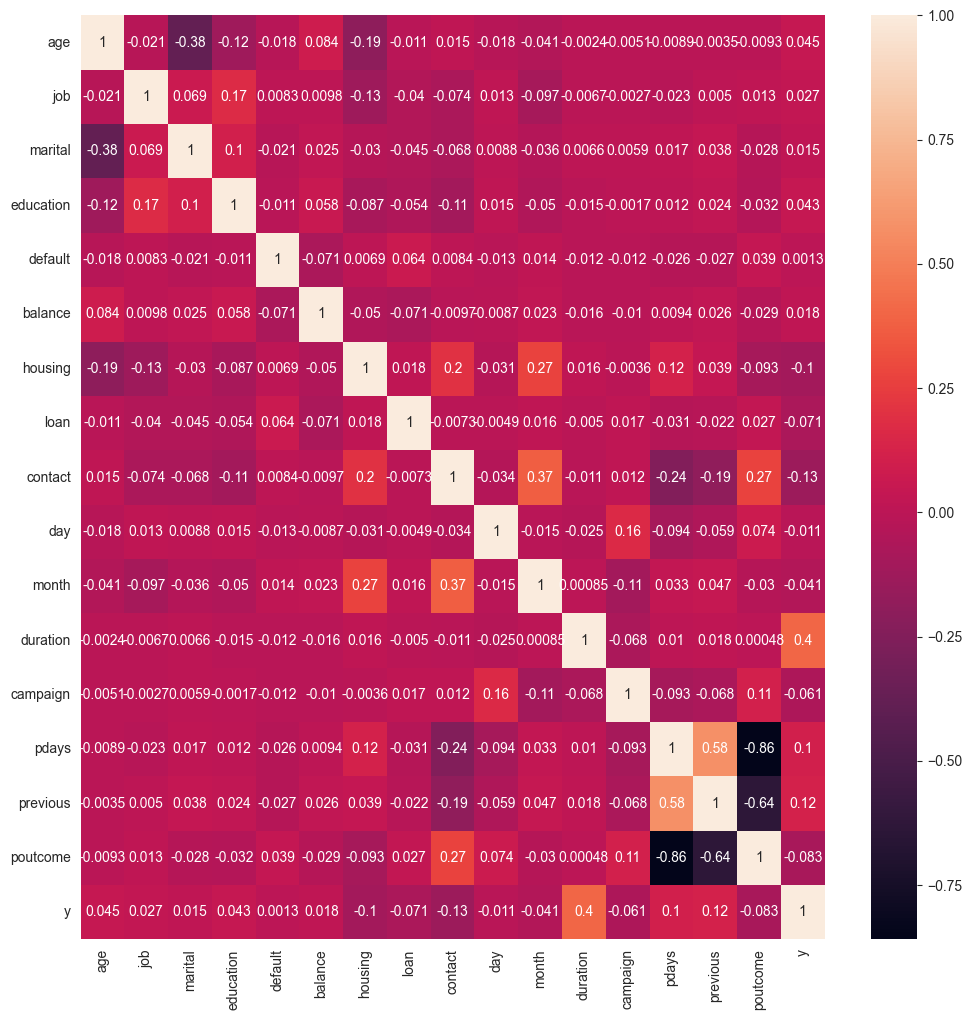

In [292]:
plt.figure(figsize=(12,12))
sns.heatmap(data=data1.corr(), annot=True)

Above heatmap shows us correlation values between all features and towards target column.

# Check for unbalanced data and skewness

We se in bellow cel code and output for checking the count of our target column values (1 and 0).

<AxesSubplot:xlabel='y'>

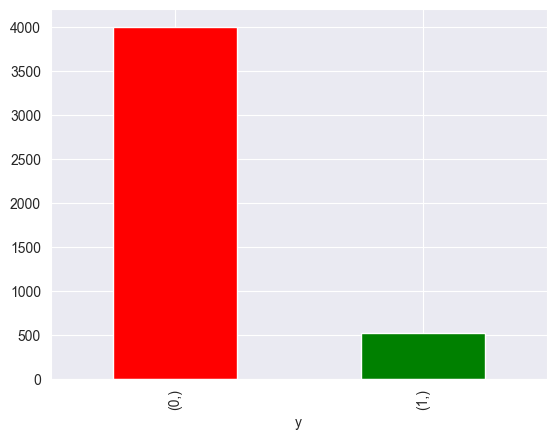

In [293]:
data[['y']].value_counts().plot(kind='bar',color=['red', 'green'])

As we can see we have an imbalanced dataset so `SMOTE` sampler would be a good choice for creating balanced data from our train data.

In [294]:
skew_cols = pd.DataFrame()
sk = pd.DataFrame()
skew_cols['skew'] = (abs(X.skew()).sort_values(ascending=False) >= 0.75)
sk = skew_cols.T
sk

,default,balance,previous,campaign,duration,pdays,poutcome,loan,contact,age,month,housing,job,education,day,marital
skew,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False


In [295]:
sk = sk.loc[:, sk.all()]
sk = sk.columns
sk

Index(['default', 'balance', 'previous', 'campaign', 'duration', 'pdays',
       'poutcome', 'loan'],
      dtype='object')

Above we can see columns with skewness above 0.75. We cant log or sqrt transform them due to them not having all positive values.

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [297]:
smote_sampler = SMOTE(random_state=42)
# Resample training data using SMOTE
X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)
print(X_smo.shape, y_smo.shape)

(6020, 16) (6020,)


`get_scores()` function is a helper function that we can use to easily 'grade' predictions from different models. This function plots confusion matrix for each model to visualise predictions compared to actual target values. 

In [298]:
def get_scores(p,t, model):
    prec, rec, fscore, _ = precision_recall_fscore_support(p,t, average='weighted')
    acc = accuracy_score(p,t)
    print('for model: \n')
    display(model)
    print('Precision: ' + str(prec) + '\nRecall: ' + str(rec) + '\nF-score: ' + str(fscore) + '\nAccuracy: ' + str(acc))
    sns.set_palette(sns.color_palette())
    
    _, ax = plt.subplots(figsize=(8,8))
    ax = sns.heatmap(confusion_matrix(p, t), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})
    labels = ['False', 'True']
    ax.set_xticklabels(labels, fontsize=25)
    ax.set_yticklabels(labels[::-1], fontsize=25)
    ax.set_ylabel('Prediction', fontsize=30)
    ax.set_xlabel('Ground Truth', fontsize=30)

Before we implement various models it is important to consider that we are not looking specifically for only accuracy rather we aim to balance precision and recall and try to get their respective best values.

# Simple classification models 

for model: 


LogisticRegression(max_iter=1000, random_state=42)

Precision: 0.7814752297510918
Recall: 0.7992926613616269
F-score: 0.7743574574896952
Accuracy: 0.7992926613616269


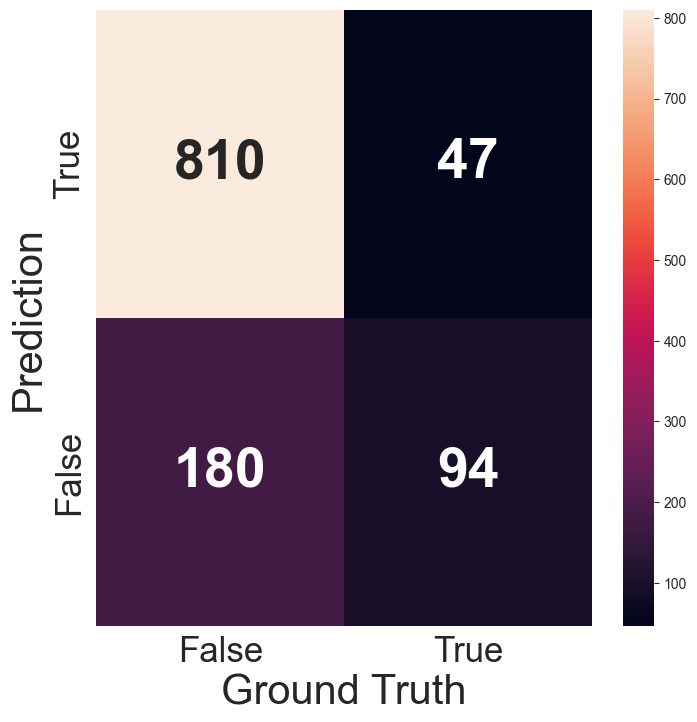

In [299]:
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_smo, y_smo)
pred = lr.predict(X_test)

get_scores(pred,y_test,lr)

for model: 


KNeighborsClassifier(n_neighbors=10, weights='distance')

Precision: 0.7591230893505287
Recall: 0.7833775419982316
F-score: 0.7564650972906402
Accuracy: 0.7833775419982316


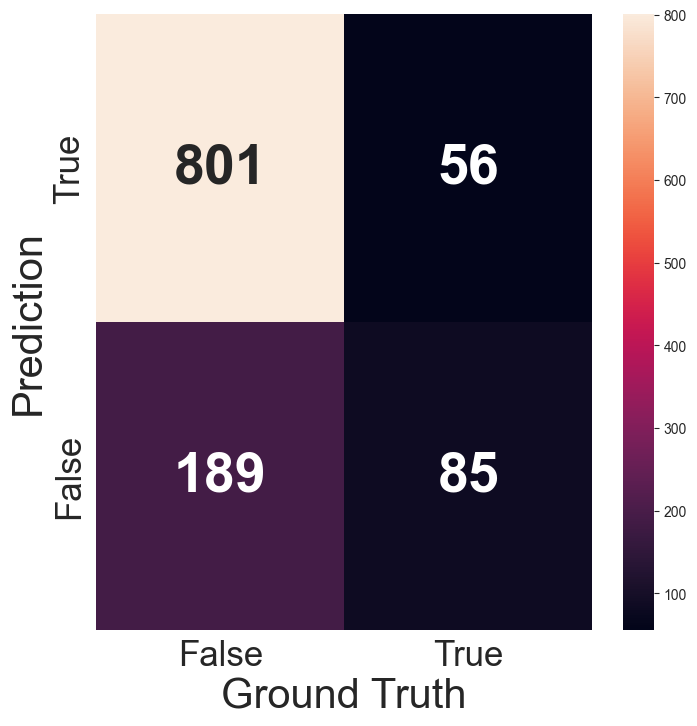

In [300]:
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn.fit(X_smo, y_smo)
pred = knn.predict(X_test)

get_scores(pred,y_test,knn)

In our more simple models `LogisticRegression` model preforms better than `KNN` model given the scores above. Do take into consideration that with other combinations of hyperparameters there could be a less significant difference achieved between these two classifiers.

# More complex models + Grid Search

In [301]:
xgc_cv = XGBClassifier(objective='binary:logistic',random_state=42)

param_grid = {'learning_rate': [0.1*(n+1) for n in range(6)],
              'n_estimators' : [100*n+1 for n in range(6)]}

search = GridSearchCV(estimator=xgc_cv, param_grid=param_grid,scoring="accuracy",cv=3)
search.fit(X_smo, y_smo)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

for model: 


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=501,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

Precision: 0.8773167269132053
Recall: 0.8753315649867374
F-score: 0.8762997182253894
Accuracy: 0.8753315649867374


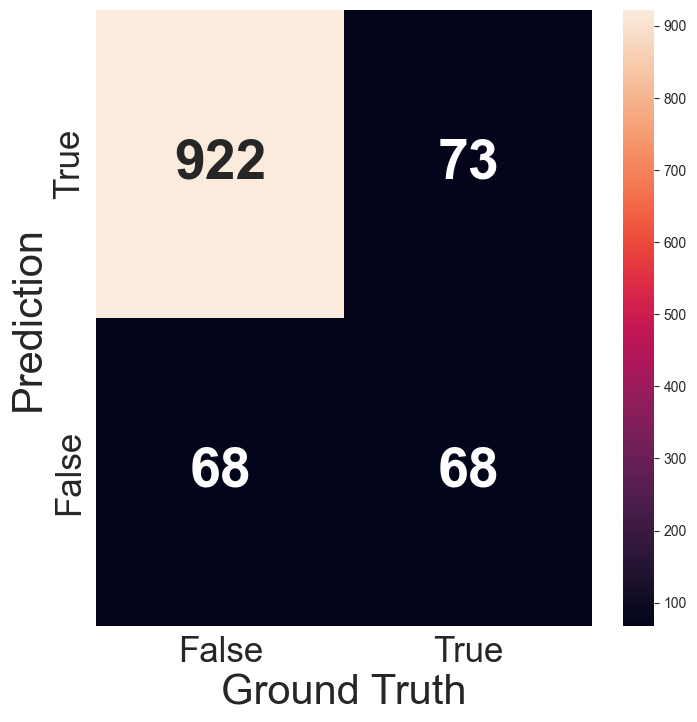

In [302]:
best = search.best_estimator_
pred = best.predict(X_test)
get_scores(pred,y_test,best)

In [303]:
abc = AdaBoostClassifier()

param_grid = {'learning_rate': [0.1*(n+1) for n in range(10)],
              'n_estimators' : [2*n+1 for n in range(10)],
              'algorithm':['SAMME', 'SAMME.R']}

search = GridSearchCV(estimator=abc,param_grid=param_grid,scoring='accuracy',cv=3)
search.fit(X_smo, y_smo)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.2, 0.30000000000000004, 0.4,
                                           0.5, 0.6000000000000001,
                                           0.7000000000000001, 0.8, 0.9, 1.0],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
             scoring='accuracy')

for model: 


AdaBoostClassifier(n_estimators=19)

Precision: 0.7944863158362792
Recall: 0.8160919540229885
F-score: 0.7987780133164674
Accuracy: 0.8160919540229885


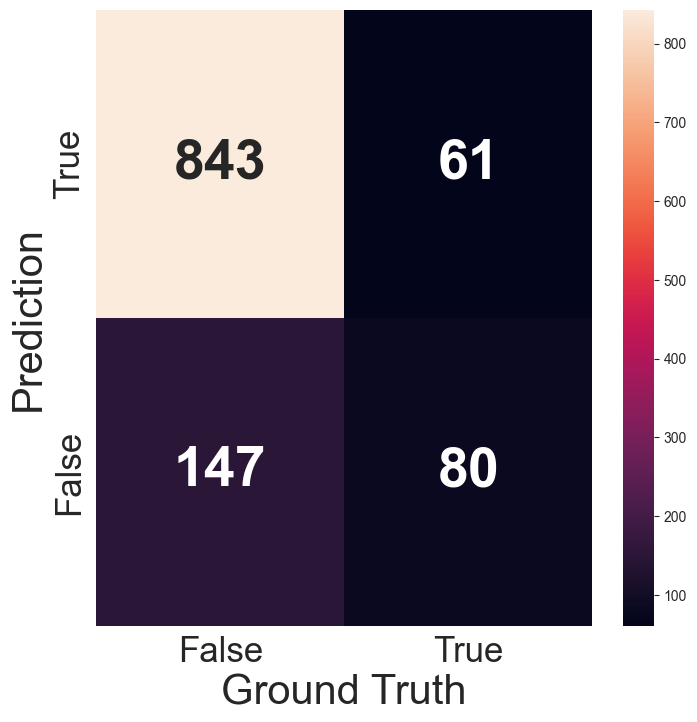

In [304]:
best = search.best_estimator_
pred = best.predict(X_test)
get_scores(pred,y_test,best)

We see that `XGBClassifier` preforms the best so far. Given the balanced and higher results from previous classification scores we can expect that XGBClassifier will be the best in the boundaries of this project and this dataset. 

But before we conclude, we need to try stacking method to see if combination of predictions will give us better results. 

# Stacking

Let us check if stacking 3 classification models could result in better results.

In [305]:
estimators = [('SVM',SVC(random_state=42, C=0.1, kernel='poly')),('knn',KNeighborsClassifier(n_neighbors=5)),('dt',DecisionTreeClassifier(random_state=42, max_depth=5))]
estimators

[('SVM', SVC(C=0.1, kernel='poly', random_state=42)),
 ('knn', KNeighborsClassifier()),
 ('dt', DecisionTreeClassifier(max_depth=5, random_state=42))]

for model: 


StackingClassifier(estimators=[('SVM',
                                SVC(C=0.1, kernel='poly', random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('dt',
                                DecisionTreeClassifier(max_depth=5,
                                                       random_state=42))],
                   final_estimator=LogisticRegression())

Precision: 0.798049631138406
Recall: 0.8187444739168878
F-score: 0.8048442299620712
Accuracy: 0.8187444739168878


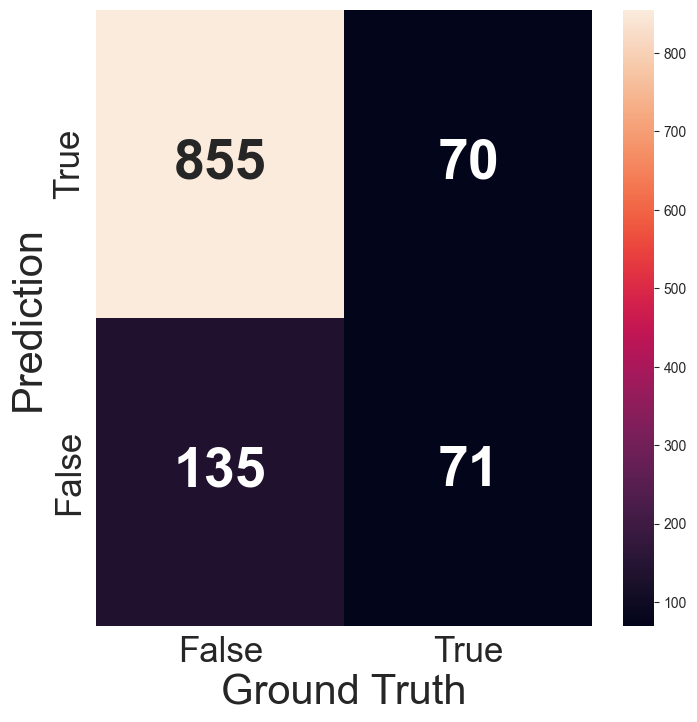

In [306]:
clf = StackingClassifier( estimators=estimators, final_estimator= LogisticRegression())
clf.fit(X_smo,y_smo)

pred = clf.predict(X_test)
get_scores(pred,y_test,clf)

We see that using stacking we get no better results than using only XGBClassifier with Grid Search.

# Key findings

Some feature columns in this dataset are heavily skewed so that might be the reason we are not achieving that perfect 0.99 precision and recall. So finding a way to bring the distribution of those columns to a more normal one should be one task to consider in further analysis of this dataset.

Scaling the data could lead to better results as well. So using the `MinMaxScaler` or `StandardScaler` can be one of primary tasks in future experiments with this data.

Data is unbalanced as we saw before, so to counter that we used `SMOTE` sampler but there are other ways of sampling your data that could lead to more precise models like using `StratifiedShufleSplit` or under sampling methods. 

# Conclusion

In general `XGBClassifier` with Grid Search preforms best for this data set. Scores for the best classifier fit in the range of 0.88 to 0.90 for precision, fscore, recall and accuracy meaning we found a good and balanced classifier.

All other implemented models did fairly well but XGBC is better with this hyperparameters given above. 

This dataset is perfect for this kind of project because it highlights the practical usage of classification predictive models in a real environment (in this example the bank system).   

# Next steps

Code below would be a next step in finding the best set of models for prediction. 
But we need to keep in mind that more complex models could lead to exponentially more required computation power and they are prone to overfitting.

Code below needs 2+ hours to execute on my personal machine for this dataset. 

```python
estimators = [('SVM',SVC(random_state=42)),('knn',KNeighborsClassifier()),('dt',DecisionTreeClassifier(random_state=42))]
clf = StackingClassifier( estimators=estimators, final_estimator= LogisticRegression())

param_grid = {'dt__max_depth': [n for n in range(10)],
            'dt__random_state':[0],
              'SVM__C':[0.01,0.1,1],
              'SVM__kernel':['linear', 'poly', 'rbf'],
              'knn__n_neighbors':[1,3,5,7,9]
              }

search = GridSearchCV(estimator=clf, param_grid=param_grid,scoring='accuracy')
search.fit(X_smo,y_smo)

best = search.best_estimator_
pred = best.predict(X_test)
get_scores(pred,y_test,best)
```

Using this code with different combination of classifiers could result in a better model but a more complex one.
